<a href="https://colab.research.google.com/github/asarma2012/DataScience-Analytics-Engineering-ML-Projects/blob/main/college_admissions_prediction/college_admissions_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting College Admission Chances for Candidates

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## College Admissions Dataset

In [60]:
admissions = pd.read_csv("admissions.csv")
admissions

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
...,...,...,...
639,1,3.381359,720.718438
640,1,3.083956,556.918021
641,1,3.114419,734.297679
642,1,3.549012,604.697503


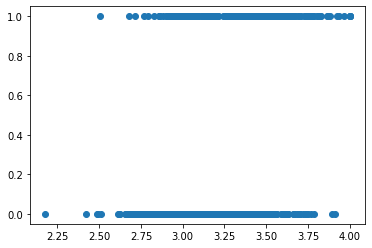

In [61]:
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

## Exploring the Logistic Function

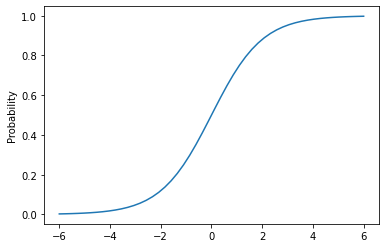

In [62]:
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

## Linear Regression vs. Logistic Regression

### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Use Logistic Regression and Predict Probabilities

Used the LogisticRegression method `predict_proba` to return the predicted probabilities for the data in the gpa column. Then the returned probabilities were assigned to `pred_probs_gpa`.
Here is a scatter plot of predicted probability vs. gpa.

Text(0, 0.5, 'Admission Probability')

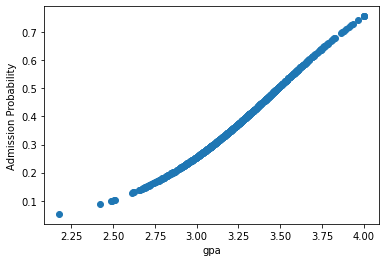

In [65]:
pred_probs_gpa = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs_gpa[:,1])
plt.xlabel('gpa')
plt.ylabel('Admission Probability')

Here, the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This is because logistic regression is an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable. 

Next is predicting whether the students based on the gpa is admitted.

Text(0, 0.5, 'Predicted Admission Result')

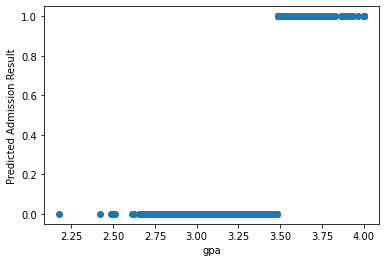

In [66]:
fitted_labels_gpa = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels_gpa)
plt.xlabel('gpa')
plt.ylabel('Predicted Admission Result')

Based on the above scatterplot, looks like any student with a gpa >= 3.5 has a chance of being admitted.

## For fun, repeat the process again, this time with GRE score

In [67]:
logistic_model2 = LogisticRegression()
logistic_model2.fit(admissions[["gre"]], admissions["admit"])
pred_probs_gre = logistic_model2.predict_proba(admissions[["gre"]])
fitted_labels_gre = logistic_model2.predict(admissions[["gre"]])

Text(0, 0.5, 'Admission Probability')

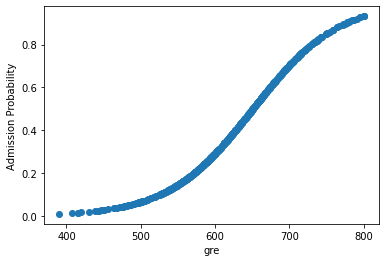

In [68]:
plt.scatter(admissions["gre"], pred_probs_gre[:,1])
plt.xlabel('gre')
plt.ylabel('Admission Probability')

Text(0, 0.5, 'Predicted Admission Result')

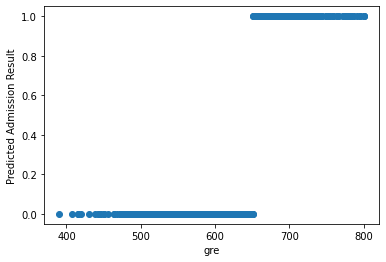

In [69]:
plt.scatter(admissions["gre"], fitted_labels_gre)
plt.xlabel('gre')
plt.ylabel('Predicted Admission Result')

Based on the above scatterplot, looks like any student with a GRE >= 660 has a chance of being admitted.

## Let's use both GPA and GRE

In [70]:
logistic_model3 = LogisticRegression()
logistic_model3.fit(admissions[["gpa","gre"]], admissions["admit"])
pred_probs_gre_gpa = logistic_model3.predict_proba(admissions[["gpa","gre"]])
fitted_labels_gre_gpa = logistic_model3.predict(admissions[["gpa","gre"]])

# Comparing Logistic Models' Accuracy

In [71]:
sum(fitted_labels_gpa == admissions['admit'])/admissions.shape[0]

0.6847826086956522

In [72]:
sum(fitted_labels_gre == admissions['admit'])/admissions.shape[0]

0.7267080745341615

In [73]:
sum(fitted_labels_gre_gpa == admissions['admit'])/admissions.shape[0]

0.7872670807453416

GPA and GRE together can predict admission chances of a candidate better than either solely GPA or solely GRE.

## Evaluating Specificity and Sensitivity of these Models


*   **True Positive (TP)**: model correctly predicted that a candidate would be admitted.
*   **True Negative (TN)**: model correctly predicted that a candidate would not be admitted.
*   **False Positive (FP)** model incorrectly predicted that a candidate would be admitted even though the student got rejected.
*   **False Negative (FN)**: model incorrectly predicted that a candidate would not be admitted even though the student got admitted.

**Calculating Sensitivity or True Positive Rate (TPR)**

\begin{equation*}
TPR = \frac{TP}{TP+FN}
\end{equation*}

**Calculating Specificity or True Negative Rate (TNR)**

\begin{equation*}
TNR = \frac{TN}{TN+FP}
\end{equation*}


In [74]:
def build_logReg(df, cols, target):
  model = LogisticRegression()
  model.fit(df[cols], df[target])
  return model.predict(df[cols])

In [75]:
admissions['predicted_by_gpa'] = build_logReg(admissions, ['gpa'], 'admit')
admissions['predicted_by_gre'] = build_logReg(admissions, ['gre'], 'admit')
admissions['predicted_by_gre_gpa'] = build_logReg(admissions, ['gpa','gre'], 'admit')
admissions

,admit,gpa,gre,predicted_by_gpa,predicted_by_gre,predicted_by_gre_gpa
0,0,3.177277,594.102992,0,0,0
1,0,3.412655,631.528607,0,0,1
2,0,2.728097,553.714399,0,0,0
3,0,3.093559,551.089985,0,0,0
4,0,3.141923,537.184894,0,0,0
...,...,...,...,...,...,...
639,1,3.381359,720.718438,0,1,1
640,1,3.083956,556.918021,0,0,0
641,1,3.114419,734.297679,0,1,1
642,1,3.549012,604.697503,1,0,1


In [76]:
def TPTN(df, prediction, actual):
  true_positive_filter = (df[prediction] == 1) & (df[actual] == 1)
  true_positives = len(df[true_positive_filter])
  true_negative_filter = (df[prediction] == 0) & (df[actual] == 0)
  true_negatives = len(df[true_negative_filter])
  false_positive_filter = (df[prediction] == 1) & (df[actual] == 0)
  false_positives = len(df[false_positive_filter])
  false_negative_filter = (df[prediction] == 0) & (df[actual] == 1)
  false_negatives = len(df[false_negative_filter])

  TPR = true_positives/(true_positives+false_negatives)
  TNR = true_negatives/(true_negatives+false_positives)

  print("Sensitivity = {}, Specificity = {}".format(TPR,TNR))

TPTN(admissions, "predicted_by_gpa", "admit")
TPTN(admissions, "predicted_by_gre", "admit")
TPTN(admissions, "predicted_by_gre_gpa", "admit")

Sensitivity = 0.36475409836065575, Specificity = 0.88
Sensitivity = 0.5409836065573771, Specificity = 0.84
Sensitivity = 0.6721311475409836, Specificity = 0.8575


For all of these models, their sensitivity values are unacceptably high. This indicates that the metrics of GPA and GRE scores are not enough information to accurately predict whether or not a candidate would earn admission into the university.